# Breast Cancer Data Exploratory Analysis

This dataset contains gene expression data from **TCGA** (The Cancer Genome Atlas) breast cancer patients.
Such raw counts were obtained using the reference genome **GRCH38**. The TCGA BRCA project contains 1097 gene expression profiles, while in our dataset there is only 1053 samples whose PAM50 sbutypes were already available.

The dataset is structured in the following way:

* Patients are on the rows, and 25150 protein coding genes are on the columns 
* The first column includes the TCGA ID of each patient
* The second column contains the PAM50 subtype of each patient, as publicly available on the metadata of the TCGA BRCA project 



In [1]:
import pandas as pd
import os
import seaborn as sns
import pickle as pkl
import matplotlib
import matplotlib.pyplot as plt

# Set parameters
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 10
plt.rcParams["figure.figsize"] = (8, 6)

## Table Form Visualization

In [2]:
DATASET_PATH = "tcga_brca_raw_19036_1053samples.pkl"

with open(DATASET_PATH, 'rb') as file:
    dataset = pkl.load(file) 

dataset.head()

,tcga_id,expert_PAM50_subtype,sample_id,cancer_type,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA-3C-AAAU,LumA,1CBCD09F-2824-4E99-B657-F9565E9C9372,Breast Invasive Carcinoma,57898,67829,134,1697402,44314,1737,...,127715,285105,80532,272148,283023,84420,356353,1054121,557596,409660
1,TCGA-3C-AALI,Her2,58FB7633-DF82-406F-B4CB-277BE8DE003D,Breast Invasive Carcinoma,52146,65152,1361,1403901,36852,1636,...,225863,188283,24306,79305,219241,42889,112979,1041074,247545,88163
2,TCGA-3C-AALJ,LumB,F7B0D141-4D33-4A6E-8E05-08F7CF325459,Breast Invasive Carcinoma,52172,29356,510,989281,30378,282,...,36095,292971,9799,56118,48681,40923,63021,613785,110466,68745
3,TCGA-3C-AALK,LumA,22CB86F1-88B4-405A-B20F-A29694950367,Breast Invasive Carcinoma,50517,43436,287,2674831,69374,816,...,99575,169487,27979,99448,126525,48154,150177,1397623,196615,206477
4,TCGA-4H-AAAK,LumA,71F8A28D-077A-4A91-B56E-B035E4861E9C,Breast Invasive Carcinoma,66433,66229,192,2279532,56667,1603,...,99144,171558,23633,95460,118564,4928,188499,970767,199472,246179


In [3]:
print('Number of samples: ', dataset.shape[0])
print('Number of genes: ', dataset.shape[1] - 4) # first 4 columns dont represent genes
print('PAM50 sybtypes: ', dataset.expert_PAM50_subtype.unique())
print('Cancer types: ', dataset.cancer_type.unique())

Number of samples:  1053
Number of genes:  25150
PAM50 sybtypes:  ['LumA' 'Her2' 'LumB' 'Basal' 'Normal']
Cancer types:  ['Breast Invasive Carcinoma']


## Class Imbalance Issue

From the previous plot it is obvious that in our dataset classes are not balanced. In order to solve or reduce this problem there are several approached we can use:

* Using other metrics except accuracy, i.e. F1-score, precision, recall, and confusion matrices
* Resampling (over- and under- sampling)
* Generating new samples with SMOTE or Tomek links

Number of samples per class:
LumA      546
LumB      208
Basal     179
Her2       81
Normal     39
Name: expert_PAM50_subtype, dtype: int64


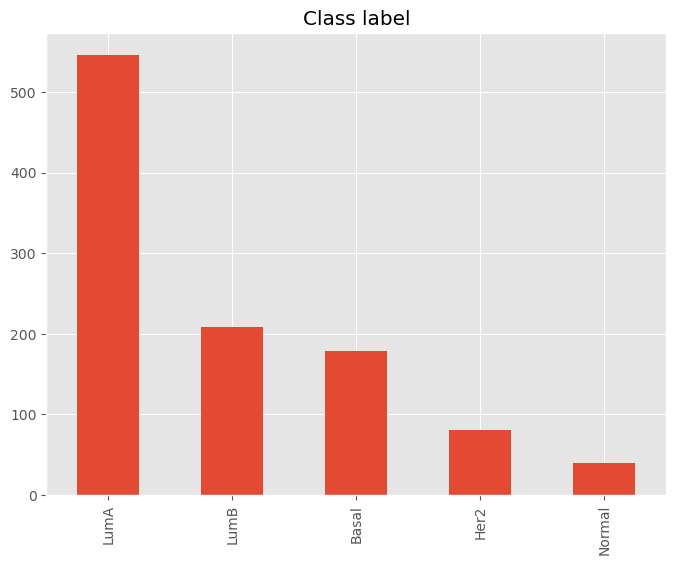

In [4]:
# Check the class balanse status of a dataset
y = dataset.expert_PAM50_subtype
ax = y.value_counts().plot(kind='bar', title='Class label')

print('Number of samples per class:')
print(y.value_counts())


## Gene correlation

There are several approaches to observe the correlation. Firstly the correlation between features i.e. genes can be obtained with Pearson's or Spearman's correlation. Secondly, the correlation between each feature (gene) and target should be also observed.

Pearson correlation measures the strength of the linear relationship between two random variables, whereas Spearman’s rank correlation evaluates how well the correlation between two variables can be formulated by a monotonic function. Also, maximal information coefficient (MIC) and distance correlation should be considered as more complex metrics for correlation.

### Pearson's Correlation

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [5]:
# Take only the gene columns
genes_data = dataset.drop(columns=['tcga_id','expert_PAM50_subtype','sample_id','cancer_type'], inplace=False)



In [ ]:
# Compute Pearson's correlation
corr_matrix = genes_data.corr().abs()

In [ ]:
def find_high_corr(corr_matrix, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

high_corr_cols = find_high_corr(corr_matrix, threshold=0.8)
high_corr_cols

{'SEC61A1',
 'ZNF354C',
 'SPACA4',
 'GNG11',
 'MIR454',
 'SNORA80E',
 'ARNTL2-AS1',
 'HNRNPU',
 'IQCA1L',
 'MIR3689C',
 'SIGLEC7',
 'LOC101927138',
 'VLDLR-AS1',
 'NAE1',
 'EPPIN',
 'IST1',
 'MIR1302-6',
 'IKZF1',
 'SCGB1A1',
 'SNORD82',
 'FAM129C',
 'SLX1A',
 'MAX',
 'RNU4-2',
 'LINC01043',
 'MYO1G',
 'CLPX',
 'TRIM37',
 'OR3A2',
 'USP42',
 'LOC101928322',
 'RNU6-1',
 'CHMP2B',
 'PFDN5',
 'XCL2',
 'ATF6',
 'GBX2',
 'LOC101928837',
 'NSMCE4A',
 'RNASE11',
 'SMG1',
 'MTCP1',
 'LOC107161159',
 'PIK3CG',
 'FGG',
 'TFB2M',
 'DCN',
 'C11orf65',
 'SEPT1',
 'CSN1S2AP',
 'GOLGA6L4',
 'ST18',
 'CDH6',
 'PKD1P6-NPIPP1',
 'SPIC',
 'RNF215',
 'HMGXB4',
 'USP37',
 'MIR6134',
 'PSMB8',
 'SNORA53',
 'UBE2A',
 'NSD1',
 'PRDX1',
 'FAM26E',
 'HLA-G',
 'WWTR1-AS1',
 'SNORD109A',
 'IL1R2',
 'MARVELD2',
 'FCRLA',
 'LOC100133286',
 'HTR7P1',
 'ST8SIA3',
 'MIR4509-3',
 'CARM1',
 'HCCS',
 'LRRC37A',
 'SMG1P6',
 'TUBA1C',
 'SLAMF8',
 'WLS',
 'APOBEC3B-AS1',
 'CDCA8',
 'ITSN2',
 'ELK4',
 'ZNF707',
 'MAMDC2-AS1'

In [9]:
import pickle

# Save features that should be removed
with open('high_corr_feat.pkl', 'wb') as file:
    pickle.dump(high_corr_cols, file)

In [6]:
print('Number of genes in the dataset:', genes_data.shape[1])
print('Number of higly correlated genes:',len(high_corr_cols))

# Remove the higly correlated genes
genes_data.drop(columns=high_corr_cols, inplace=True)

print('Number of genes in the dataset after filtering:', genes_data.shape[1])

Number of genes in the dataset: 25150


NameError: name 'high_corr_cols' is not defined

<AxesSubplot: >

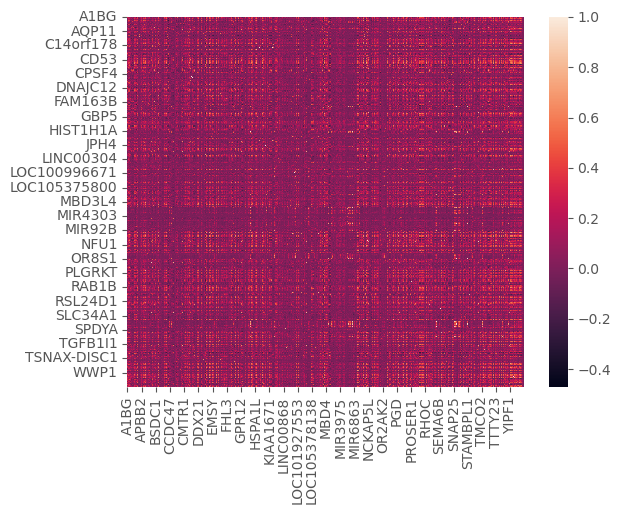

In [5]:
import plotly.graph_objects as go

# Creating edges

#sns.heatmap(corr_matrix)

# Wrapper methods

1. Step Forward Selection
2. Backward Elimination
3. Recursive Feature Selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# But firstly let's split and normalize the dataset
X = dataset.drop(columns=['expert_PAM50_subtype', 'tcga_id', 'sample_id', 'cancer_type'], inplace=False)
y = dataset.expert_PAM50_subtype

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, 
                                                    shuffle=True, stratify=y)  

def log_transform(x):
    print(x)
    return np.log(x + 1)

scaler = FunctionTransformer(log_transform)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

LB = LabelEncoder()
y_train = LB.fit_transform(y_train)

X_train_scaled

       A1BG  A1BG-AS1  A1CF       A2M  A2M-AS1    A2ML1  A2MP1  A3GALT2  \
957   39293     82136    21   2560567    43096     4861   1297        4   
827  313741     87683     0   1696843   181682      384    534        0   
119   12409     16848   197   1529876    31250   814691   3337      478   
626   20390     52302   623  15230218   320222   572832  13433        0   
909   45834     47305   200   6119844    97869    15433   3092       52   
..      ...       ...   ...       ...      ...      ...    ...      ...   
428   73162     75663    72   3651985    93411     1502    867      123   
238   26290     58902   457   3908891   125975  4583468   5110      284   
637   34616     52300   671   2321846    39606     1203   1837       74   
209  124547     56645   356   3227134   121238     3563   3471        8   
597   18545     42675   100   1770562    31096      777   1195       24   

     A4GALT  A4GNT  ...  ZWILCH   ZWINT   ZXDA    ZXDB    ZXDC  ZYG11A  \
957   70149    100  ...  

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
957,10.578827,11.316144,3.091042,14.755740,10.671209,8.489205,7.168580,1.609438,11.158391,4.615121,...,11.876012,12.120618,11.227534,12.980076,11.993226,10.010367,12.868616,13.669048,13.214673,12.810266
827,12.656326,11.381495,0.000000,14.344281,12.110019,5.953243,6.282267,0.000000,11.427324,0.000000,...,10.956056,11.666204,8.626586,10.435732,11.588051,7.227662,10.896832,13.906836,11.233807,10.659656
119,9.426258,9.732047,5.288267,14.240698,10.349807,13.610565,8.113127,6.171701,9.542805,0.000000,...,12.568415,12.592250,10.778310,12.271949,12.951224,11.868409,13.069032,14.668576,12.929953,13.092442
626,9.922849,10.864809,6.436150,16.538792,12.676773,13.258350,9.505544,0.000000,11.457603,6.388561,...,12.724092,13.092193,11.470373,12.601346,12.499936,10.824388,13.357704,13.840802,13.403635,13.596197
909,10.732803,10.764392,5.303305,15.627047,11.491395,9.644328,8.036897,3.970292,11.171660,5.525453,...,12.385452,12.889702,11.309707,12.732908,12.250458,10.391515,13.117198,14.916085,13.094262,12.986062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11.200445,11.234058,4.290459,15.110782,11.444775,7.315218,6.766192,4.820282,11.898963,5.361292,...,12.140979,12.645140,11.287730,13.174912,12.306610,9.043577,12.650605,13.878393,12.667127,12.683533
238,10.176982,10.983647,6.126869,15.178765,11.743847,15.337967,8.539150,5.652489,10.698040,5.017280,...,12.230175,12.582514,11.003399,12.275631,12.156084,10.875024,12.670643,13.903564,13.133899,12.342202
637,10.452100,10.864771,6.510258,14.657874,10.586761,7.093405,7.516433,4.317488,10.604057,0.000000,...,11.438536,11.265143,10.898479,11.827853,12.157124,10.371865,12.581639,13.259864,13.022715,12.843969
209,11.732446,10.944577,5.877736,14.987105,11.705519,8.178639,8.152486,2.197225,11.637556,0.000000,...,11.609789,12.775347,10.013418,11.783067,12.111652,10.530255,11.928664,13.891793,12.007945,12.421857


In [7]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import  SelectKBest, f_classif, chi2


In [ ]:
# Define the estimator
model  = LogisticRegression(solver='saga', C=0.001, max_iter=200)

# Define the SFS object
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=100, 
                                direction='forward', scoring='accuracy', cv=5)

sfs.fit(X_train_scaled, y_train)

In [17]:
def selected_feat(method):
    model = SelectKBest(score_func=method, k=19308) # k needs to be defined
    model.fit(X_train_scaled, y_train)
    df_scores = pd.DataFrame(model.scores_)
    df_feats = pd.DataFrame(X.columns)

    featureScores = pd.concat([df_feats, df_scores],axis=1)
    featureScores.columns = ['Feature', 'Score'] 

    selected_feat = featureScores.sort_values(by='Score')[-1000:]['Feature']
    return selected_feat

selected_chi = selected_feat(chi2)
selected_f = selected_feat(f_classif)

# Find the intersection 
intersect_feat = set(selected_chi).intersection(set(selected_f))
len(intersect_feat)

187

            Feature        Score
4076           CT83  2607.206329
7542           HAO1  1078.368884
11388  LOC105369486  1062.172775
21663         STRA8  1057.275334
6261          FGF21  1048.241992
7374    GS1-594A7.3  1028.144721
22437          TLX3  1026.284512
12380        MAGEB1  1004.324147
19839     SERPINB12   940.935583
12387        MAGEB4   938.814915


<Figure size 800x600 with 0 Axes>

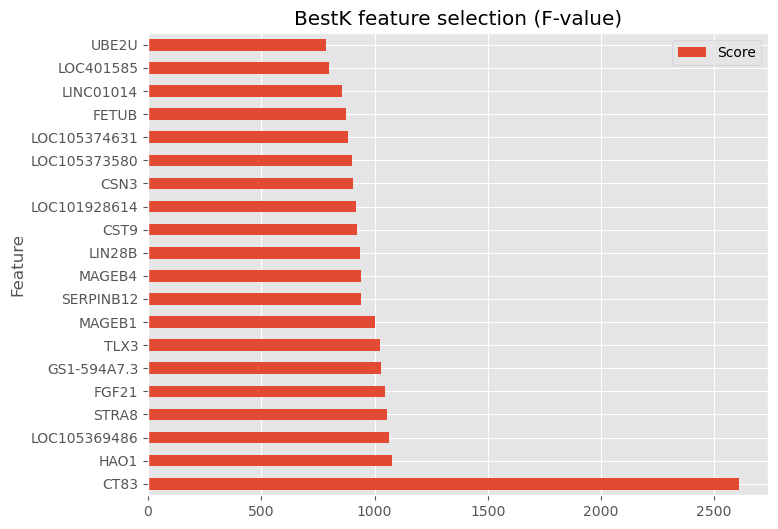

In [18]:
model = SelectKBest(score_func=chi2, k=19308) # k needs to be defined
model.fit(X_train_scaled, y_train)
df_scores = pd.DataFrame(model.scores_)
df_feats = pd.DataFrame(X.columns)

featureScores = pd.concat([df_feats, df_scores],axis=1)
featureScores.columns = ['Feature', 'Score'] 

plt.figure()
featureScores.nlargest(20, 'Score').plot(kind='barh', x='Feature')
plt.title('BestK feature selection (F-value)')
print(featureScores.nlargest(10, 'Score'))

In [19]:
# -------------- Recursive Feature Elimination -----------------

rfe_selector = RFE(estimator=LogisticRegression(solver='saga'), n_features_to_select=19308, step=1000, verbose=5)
rfe_selector.fit(X_train_scaled, y_train)
rfe_support = rfe_selector.get_support()

selected_feat = X.loc[:,rfe_support].columns.tolist()
print(str(len(selected_feat)), 'selected features')

Fitting estimator with 25150 features.
Fitting estimator with 24150 features.
Fitting estimator with 23150 features.
Fitting estimator with 22150 features.
Fitting estimator with 21150 features.
Fitting estimator with 20150 features.
19308 selected features


Steps:

1. Load the dataset and do the train|test split 
2. Improve the imbalance situation
3. Standardization of the train set only
4. Define the model 
5. Define the feature selection technique:
    * SULOV 
    * Recursive XGBoost
6. Add grid search to find a better solution
7. Test on the test set

## Clustering approaches

* K-means
* Density-based Spatial Clustering (DBSCAN)
* Hierarchical agglomerative Clustering

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(genes_data, y, test_size=0.3, random_state=1, 
                                                    shuffle=True, stratify=y)     
# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
 

### K-Means

In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-means
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")

kmeans.fit(X_train_scaled)
labels_assigned = kmeans.labels_
labels = kmeans.get_feature_names_out()

clusters = kmeans.predict(X_test)
cluster_coords = kmeans.cluster_centers_

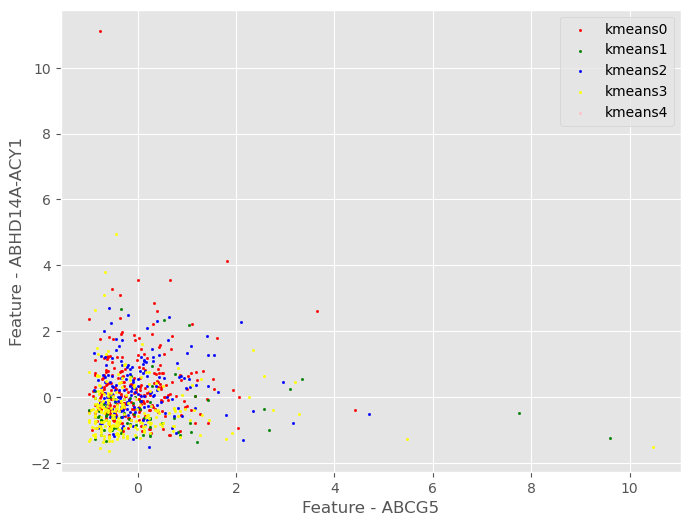

In [11]:
# Let's try to visualize the clusters from different planes
def plot_clusters(gene_data, y, feat_idx_1, feat_idx_2, labels):

    feature_names = gene_data.columns
    label_colors = ['red', 'green', 'blue', 'yellow', 'pink']

    # Plot by labels
    for i, label in enumerate(labels):
        plt.scatter(gene_data.iloc[:,feat_idx_1][labels_assigned==i], 
                    gene_data.iloc[:,feat_idx_2][labels_assigned==i],
                    marker = '.', c = label_colors[i], s=10)
    
    plt.xlabel("Feature - " + feature_names[feat_idx_1])
    plt.ylabel("Feature - " + feature_names[feat_idx_2])
    plt.legend(labels)

plot_clusters(X_train, clusters, 90, 100, labels)

### DBSCAN 

DBSCAN is a density-based clustering non-parametric algorithm. Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away - noise points). 

DBSCAN requires two parameters: **ε (eps)** and the **minimum number of points** required to form a dense region. It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster.

If a point is found to be a dense part of a cluster, its ε-neighborhood is also part of that cluster. Hence, all points that are found within the ε-neighborhood are added, as is their own ε-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

DBSCAN can be used with any distance function!

In [12]:
dbscan = DBSCAN(eps=0.001,min_samples=100)
dbscan.fit(X_train_scaled)
db_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 0
Estimated number of noise points: 737


### Agglomerative Clustering

In [13]:
import numpy as np

agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agg_cluster.fit(X_train_scaled)
labels = np.unique(agg_cluster.labels_)

# Number of clusters in labels, ignoring noise if present.
n_per_cluster = [list(agg_cluster.labels_).count(i) for i in range(5)]

print("Number of labels per cluster: ", n_per_cluster)

Number of labels per cluster:  [294, 66, 4, 303, 70]


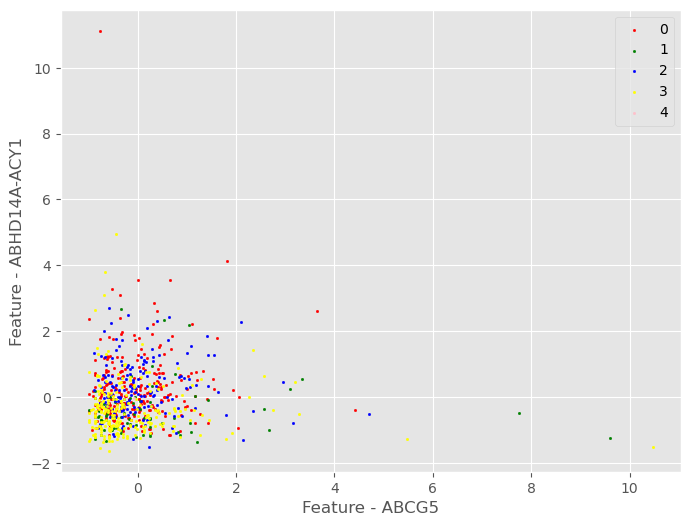

In [14]:
plot_clusters(X_train, labels_assigned, 90, 100, labels)

### Visualizing High Dimensional Clusters

* Principal Component Analysis (PCA)

    PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.
    
* T-Distributed Stochastic Neighbor Embedding (T-SNE)


In [15]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [16]:
# Let's try to visualize the clusters from different planes
def plot_pca(df_pca_2, labels, dim=2):

    label_colors = ['red', 'green', 'blue', 'yellow', 'pink']

    if dim==2:
        for i, label in enumerate(labels):
            plt.scatter(df_pca_2.iloc[:,0][labels_assigned==i], 
                        df_pca_2.iloc[:,1][labels_assigned==i],
                        marker = '.', c = label_colors[i], s=10)
        
        plt.xlabel("PCA component 1")
        plt.ylabel("PCA component 2")

    if dim==3:

        # Creating figure
        fig = plt.figure()
        ax = plt.axes(projection ="3d")

        for i, label in enumerate(labels):
            ax.scatter3D(df_pca_2.iloc[:,0][labels_assigned==i], 
                        df_pca_2.iloc[:,1][labels_assigned==i],
                        df_pca_2.iloc[:,2][labels_assigned==i],
                        marker = '.', c = label_colors[i])
        
        ax.set_xlabel("PCA component 1")
        ax.set_ylabel("PCA component 2")
        ax.set_zlabel("PCA component 2")

    plt.legend(labels)

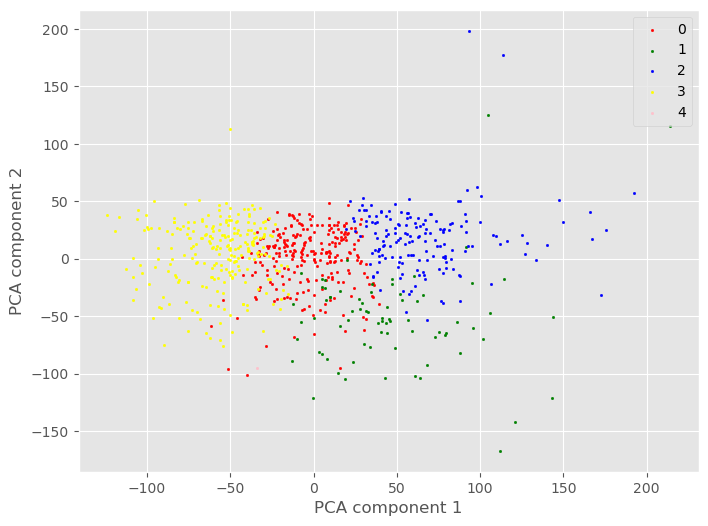

In [19]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(X_train_scaled), columns=['PCA_1', 'PCA_2'])

plot_pca(df_pca_2, labels)

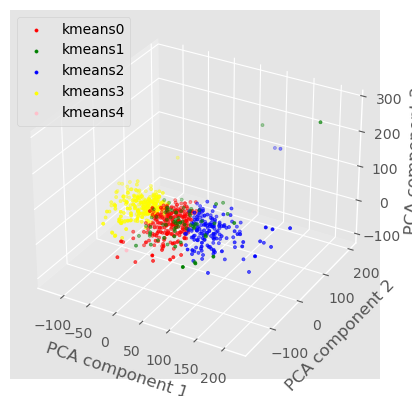

In [37]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(X_train_scaled), columns=['PCA_1', 'PCA_2', 'PCA_3'])

plot_pca(df_pca_3, labels, dim=3)

## Embeddings

Since it is really difficult to understand and intepret clusters in dimensional spaces when having more than 3 feature. For that reason, it would be useful to represent genes (in our case vectors) as vectors i.e. embeddings. Having these vectors we can also include the relationship with other genes. Firstly, we hypothesized that gene properties (samples in our case) are also distributional, such that *character of a gene can be defined by its companies* in term of gene expression, and embedding can be employed to infer the relationship between genes, therefore, relevant biological information could be retrieved from embedding space.